In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('train_exit.csv')

In [ ]:
# read the head function
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [ ]:
#to show the column
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [ ]:
data.shape

(13994, 30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

Exploratory Dataanlysis

<Axes: >

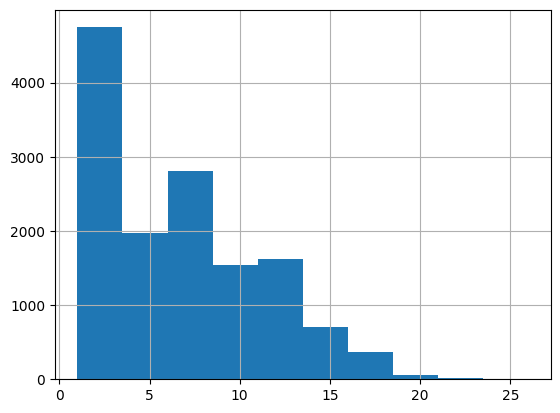

In [ ]:
data['years_of_experience'].hist()

<Axes: >

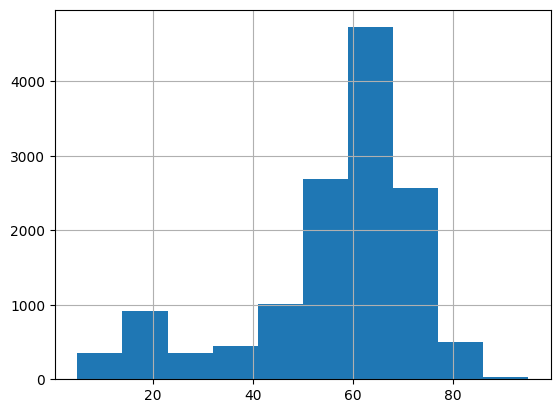

In [ ]:
data['ball_controlling_skills'].hist()

<Axes: >

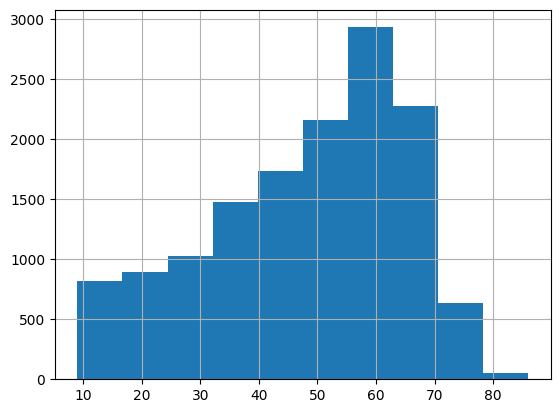

In [ ]:
data['defending_skills'].hist()

Preprocessing steps

ValueError: num must be an integer with 1 <= num <= 20, not 21

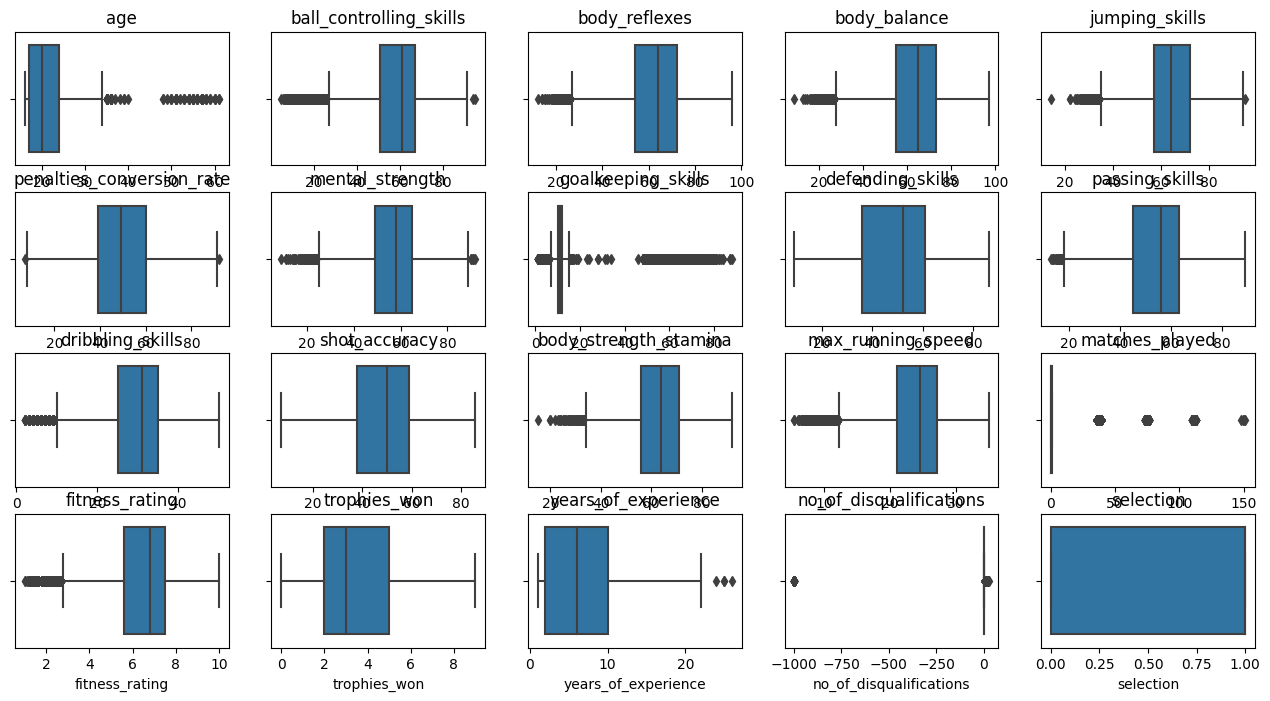

In [ ]:


# Assuming your DataFrame is named 'data'
# Replace 'df' with your actual DataFrame name if it's different

# Selecting numeric columns for outlier detection
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Creating box plots for each numeric column
plt.figure(figsize=(16, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [33]:
# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Selecting numeric columns for outlier detection
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the IQR for each numeric column
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify rows with outliers using the IQR test
outlier_indices = ((data[numeric_columns] < (Q1 - threshold * IQR)) | (data[numeric_columns] > (Q3 + threshold * IQR))).any(axis=1)

# Remove rows with outliers
df_no_outliers_iqr = data[~outlier_indices]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(data)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers_iqr)}")





Number of rows before removing outliers: 13994
Number of rows after removing outliers: 9191


In [ ]:
from  sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()

In [ ]:
label_encoder = LabelEncoder()

data['dedication_level_encoded'] = label_encoder.fit_transform(data['dedication_level'])
data['coaching_encoded'] = label_encoder.fit_transform(data['coaching'])


In [ ]:
data['behavior_rating_encoded'] = label_encoder.fit_transform(data['behaviour_rating'])

In [ ]:
data.drop(['behaviour_rating', 'dedication_level', 'coaching'], axis=1, inplace=True)


In [ ]:
data.head

<bound method NDFrame.head of         player_id                 name  age gender    country height  weight  \
0       PLID_4964           Keva Horan   23      M    Ukraine    6'2  176lbs   
1      PLID_11234           Herma Tann   18      M     Russia   5'10  148lbs   
2      PLID_19127         Eilene Kizer   16      F      Spain    6'2  172lbs   
3      PLID_17467       Andrea Badgett   27      M      Chile   5'11  165lbs   
4       PLID_9661  Jeremiah Bumbalough   19      F  Argentina    5'8  158lbs   
...           ...                  ...  ...    ...        ...    ...     ...   
13989  PLID_10956         Viva Stepney   20      M    Uruguay    6'0  161lbs   
13990  PLID_17290           Illa Pitre   18      F    England   5'10  165lbs   
13991   PLID_5193    Marylouise Mosley   17      M      Japan    6'0  172lbs   
13992  PLID_12173       Teri Escamilla   20      F    Ukraine   5'10  150lbs   
13993    PLID_236       Darius Schuman   16      F      Chile    5'8  159lbs   

       ba

Model selection,Tuning,spliting data

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'data'
# Replace 'data' with your actual DataFrame name if it's different

# Selecting features and target variable
X = data.drop(['player_id', 'name', 'selection'], axis=1)
y = data['selection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')


ValueError: could not convert string to float: 'F'

In [38]:
# Check for missing values
print(X_train.isnull().sum())

# Check data types
print(X_train.dtypes)


age                            0
gender                        16
country                        0
height                         0
weight                       337
ball_controlling_skills      334
body_reflexes                  0
body_balance                   0
jumping_skills                17
penalties_conversion_rate     23
mental_strength               23
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                480
body_strength_stamina          0
max_running_speed              0
strong_foot                  463
matches_played               532
fitness_rating               559
trophies_won                   0
years_of_experience          114
no_of_disqualifications        0
dedication_level_encoded       0
coaching_encoded               0
behavior_rating_encoded        0
dtype: int64
age                            int64
gender                        object
country               

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming your DataFrame is named 'df_no_outliers'
# Replace 'df_no_outliers' with your actual DataFrame name if it's different

# Selecting features and target variable
X = data.drop(['player_id', 'name', 'selection'], axis=1)
y = data['selection']

# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize the RandomForestClassifier with the preprocessor in a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.8310110753840657


In [40]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
matches_played               666
fitness_rating               695
trophies_won                   0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dedication_level_encoded       0
coaching_encoded               0
behavior_rating_encoded        0
dtype: int

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'df_no_outliers'
# Replace 'df_no_outliers' with your actual DataFrame name if it's different

# Selecting features and target variable
X = data.drop(['player_id', 'name', 'selection'], axis=1)
y = data['selection']

# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize the RandomForestClassifier with the preprocessor in a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.8310110753840657


In [42]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
matches_played               666
fitness_rating               695
trophies_won                   0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dedication_level_encoded       0
coaching_encoded               0
behavior_rating_encoded        0
dtype: int

In [43]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named 'df_no_outliers'
# Replace 'df_no_outliers' with your actual DataFrame name if it's different

# Selecting features and target variable
X = data.drop(['player_id', 'name', 'selection'], axis=1)
y = data['selection']

# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize the RandomForestClassifier with the preprocessor in a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.8310110753840657


In [44]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
matches_played               666
fitness_rating               695
trophies_won                   0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dedication_level_encoded       0
coaching_encoded               0
behavior_rating_encoded        0
dtype: int

In [46]:
# Assuming your DataFrame is named 'df'
# Replace 'df' with your actual DataFrame name if it's different

# Drop rows with null values
df_cleaned = data.dropna()

# Print the number of rows before and after removing null values
print(f"Number of rows before removing null values: {len(data)}")
print(f"Number of rows after removing null values: {len(df_cleaned)}")


Number of rows before removing null values: 13994
Number of rows after removing null values: 10807


In [48]:
# Drop rows with null values in specific columns
columns_to_check = ['age', 'gender', 'country', 'ball_controlling_skills','jumping_skills','penalties_conversion_rate' ,'mental_strength' ,'shot_accuracy' ,'strong_foot','matches_played','fitness_rating','years_of_experience']  # List the columns you want to check
df_cleaned_specific = data.dropna(subset=columns_to_check)

# Print the number of rows before and after removing null values in specific columns
print(f"Number of rows before removing null values: {len(data)}")
print(f"Number of rows after removing null values: {len(df_cleaned_specific)}")


Number of rows before removing null values: 13994
Number of rows after removing null values: 11128


In [53]:
# Drop rows with null values in specific columns
columns_to_check = ['age', 'gender', 'country','weight', 'ball_controlling_skills','jumping_skills','penalties_conversion_rate' ,'mental_strength' ,'shot_accuracy' ,'strong_foot','matches_played','fitness_rating','years_of_experience']  # List the columns you want to check
df_cleaned_specific = data.dropna(subset=columns_to_check)

# Print the number of rows before and after removing null values in specific columns
print(f"Number of rows before removing null values: {len(data)}")
print(f"Number of rows after removing null values: {len(df_cleaned_specific)}")

Number of rows before removing null values: 13994
Number of rows after removing null values: 10807


In [54]:
df_cleaned_specific.isna().sum()


player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
matches_played               0
fitness_rating               0
trophies_won                 0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dedication_level_encoded     0
coaching_encoded             0
behavior_rating_encoded      0
dtype: int64

In [49]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
matches_played               666
fitness_rating               695
trophies_won                   0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dedication_level_encoded       0
coaching_encoded               0
behavior_rating_encoded        0
dtype: int

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Assuming your cleaned DataFrame is named 'df_cleaned'
# Replace 'df_cleaned' with your actual DataFrame name if it's different

# Selecting features and target variable
X = df_cleaned.drop(['player_id', 'name', 'selection'], axis=1)
y = df_cleaned['selection']

# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize the RandomForestClassifier with the preprocessor in a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.8408880666049954
